### WEEK 1 ASSIGNMENT (PREDICTIVE ANALYTICS ALY 6020)
### NAME: SHWETANJALI DORA

### DESCRIPTION OF THE DATASET:
  
#### The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are:

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Chance of Admit: 
                   A= 90-100% chance of admission
                   B= 80-90% chance of admission
                   C= 70-80% chance of admission
                   D= 60-70% chance of admission
                   E= 50-60% chance of admission
                   F= 40-50% chance of admission

### KNN(K Nearest Neighbors)
* KNN is k nearest neighbors algorithm. It is a non-parametric supervised learning technique which can be used for classification and regression problems but mostly for classification problems. 
* The biggest use case of k-NN in real time is Recommender Systems. If we know a user likes a particular item, then you can recommend similar items for them. 
* Some other use-cases of KNN algorithm are face recognition,prediction of heart diseases etc. 
* It is also called the lazy algorithm because it doesn’t learn a discriminative function from the training data but memorizes the training dataset.


**KNN for classification**: To understand how a KNN algorithm works for classification problem let us consider one class of similar objects(A) and another class of similar objects(B). Now if we have a new object and we want to predict the class which this new object belongs to with a K value of 7. Now we draw a circle around the new object considering 7 neighbors. If maximum neighbors are from class A then we consider the new object to be class A item otherwise a class B item.


**KNN for regression**: For applying the KNN algorithm to regression we compute the distance between query example to the labeled examples and order labeled examples by distance. We usually use Euclidean, Manhattan or Minkowski distance for continuous variables and Hamming distance for categorical variables.

**Euclidean Distance=** dist((x, y), (a, b)) = √(x - a)² + (y - b)²

**Manhattan Distance=** ∑𝑖|𝑎𝑖−𝑏𝑖|

**Minkowski Distance=** (∑i=1n|Xi−Yi|p)1/p








### STEP 1: Loading the data
* Let’s start by loading the required modules to start our project
* I will be using numpy, pandas, seaborn and matplotlib initially
* Then we will read the admissions dataset in a pandas DataFrame with read_csv()

In [106]:
#data extraction

#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#read googleplaystore.csv file
data=pd.read_csv('gre.csv',delimiter=',')

#converting into a dataframe
df=pd.DataFrame(data)


#### Display head of the data frame
* Before we go further, it is always good to have a look at the various columns and what kind of attributes are present in the data so that we could get a rough idea on how to begin.
* For this action to be performed we use the **.head()** function of pandas

In [107]:
#print head of the data frame
df.head(5)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,A
1,2,324,107,4,4.0,4.5,8.87,C
2,3,316,104,3,3.0,3.5,8.00,C
3,4,322,110,3,3.5,2.5,8.67,B
4,5,314,103,2,2.0,3.0,8.21,D


Now based on the above result, we can classify the various data columns into numerical/categorical attributes:
* Numerical Attributes: GRE score, TOEFL score, University rating, SOP, LOR, CGPA
* Categorical Attributes: Chance of Admit

#### Encoding Categorical Data
* In the following data set the Chance of Admit column is categorical as it has 6 categories ie., A,B,C,D,E,F which represent the chance of being admitted into a University. This column has to be encoded. Let's start with the most basic method, which is just replacing the categories with the desired numbers. This can be achieved with the help of the replace() function in pandas. 


* We give values from 0-5 respectively to A,B,C,D,E,F.


In [108]:
#encoding of categorical data using replace() function
replace_map = {'Chance of Admit ': {'A': 0, 'B': 1,'C':2,'D':3,'E':4,'F':5}}
df.replace(replace_map, inplace=True)


####  Determine the shape of the dataset (number of rows and columns)

In [109]:
#shape of the dataset
df.shape
df.drop(columns=['University Rating']).head()


,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
0,1,337,118,4.5,4.5,9.65,0
1,2,324,107,4.0,4.5,8.87,2
2,3,316,104,3.0,3.5,8.00,2
3,4,322,110,3.5,2.5,8.67,1
4,5,314,103,2.0,3.0,8.21,3


#### RESULT: We observe that the data set has 400 candidates details.

### Changing column names for convinence
* We change the column names according to our convinence. 
* Sometimes the column names have white spaces which are unnecessary so we change them.

In [110]:
#changing the column names
df= df.rename(columns={'Serial No.':'id',
                               'GRE Score':'gre',
                               'TOEFL Score':'toefl',
                               'University Rating':'rating',
                               'SOP':'sop',
                               'LOR ':'lor',
                               'CGPA':'cgpa',
                               'Chance of Admit ':'admit'})

df.head(5)

,id,gre,toefl,rating,sop,lor,cgpa,admit
0,1,337,118,4,4.5,4.5,9.65,0
1,2,324,107,4,4.0,4.5,8.87,2
2,3,316,104,3,3.0,3.5,8.00,2
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,3


### Checking for missing values
There are a few things we always need to check when it comes to data quality. One of them is missing values.
* **Missing Values:** There might be some missing values in the data. A good practice is to replace the missing values by median of the column or we could just drop these rows if they are not huge in number.
* For checking the presence of null values we use **.isnull()** function of pandas

In [76]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Chance of Admit      0
dtype: int64

### RESULT: We observe that there are no missing values in the dataset

### Determining the data types of each attribute
* Before going further, first let us have a look at the data type of each column
* If the data type is incorrect we need to change it

In [77]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Chance of Admit        int64
dtype: object

**All the data types are correctly specified. So we can go to the next step**

### Features and Targets
**Features**:A feature is an individual measurable property or characteristic of a phenomenon being observed

**Targets**: The “target variable” is the variable whose values are to be modeled and predicted by other variables

In this problem, we are predicting the chance of a candidate being admitted based on the GRE,TOEFL,SOP,LOR and CGPA score.This means that the feature variables are the values that we use(GRE,TOEFL,SOP,LOR and CGPA ) to predict the target variable(Chance of admission).

In [78]:
import numpy as np  
import matplotlib.pyplot as plt 

### STEP 2: Choosing the feature and target variables

In [79]:
#feature variable
X = df1.iloc[:, 1:-1].values  

#target variable
y = df1.iloc[:, 7].values  


### STEP 3: Training data and testing data
The given data set is to be split into two subsets called training data and testing data.

**Training data** is the data set which is already labeled and is used to train a model.

**Testing data** is the data set which has to be labeled and a used to test the trained model.

* In python, we use the sklearn.model_selection.train_test_split() to split the arrays or matrices into random train and test subsets

* test_size=0.30 means that 30% of the data hass been assigned as test data and 70% as training data

In [80]:
#splitting data into training and testing subsets(70:30 ratio)
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

* Standardization of a dataset is a common requirement for many machine learning estimators otherwise they might behave badly if the individual features do not more or less look like standard normally distributed data. 
* StandardScaler in python is used to standardize features by removing the mean and scaling to unit variance.

In [81]:
#standardization of the dataset
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

* sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods
* scikit-learn implements nearest neighbors classifier called KNeighborsClassifier. This performs learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user.
* Initially we take k value of 5

In [82]:
#fitting training data to the model
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### STEP 4: Performance of KNN ALgorithm:
To measure the performance or accuracy of the model we use the following:

**Confusion Matrix** A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. 

* true positives (TP): Correctly predicted values.
* true negatives (TN): Correctly rejected the prediction.
* false positives (FP): We predicted yes, but correct answer is no.
* false negatives (FN): We predicted no, but correct answer is yes.

**Accuracy** The ratio of correctly predicted values to the total numer of samples in the dataset.

**F1 score** 2 * Precision * Recall/(Precision+Recall)

When to use which metric?

* Accuracy works well for balanced data and f1 score works well for imbalanced data.

* Consider a confusion matrix, if the sum of all rows is equal then the data is balanced data otherwise imbalanced data.
* If we see the support column of the output we can observe that the data is imbalanced data.

In [83]:
#testing the model 
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 


0.4166666666666667
[[14  3  0  0  0  0]
 [ 4 15  3  0  0  0]
 [ 0 10 23  2  0  0]
 [ 0  1 11 11  0  0]
 [ 0  0  4  5  4  0]
 [ 0  0  1  5  1  3]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.52      0.68      0.59        22
           2       0.55      0.66      0.60        35
           3       0.48      0.48      0.48        23
           4       0.80      0.31      0.44        13
           5       1.00      0.30      0.46        10

   micro avg       0.58      0.58      0.58       120
   macro avg       0.69      0.54      0.56       120
weighted avg       0.63      0.58      0.57       120



### STEP 5: Choosing the optimal value for K
This is the challenging part of the KNN algorithm.This can best be done by first inspecting the data. 

**Choosing high K value**: Choosing a large K value reduces variance created by nosiy data.But on the other hand it can bias the learner. There is a risk of ignoring small and yet important patterns.

**Choosing low K value**: Taking a small K value allows outliers to influence classification.For example, suppose
that some of the training examples were accidentally mislabeled. Any unlabeled example that happens to be nearest to the incorrectly labeled neighbor will be predicted to have the incorrect class, even if the other nine nearest neighbors would have voted differently.

**So the K value must be in between these extremes.**

* A simple approach to select k is set k=sqrt(n) where n is the number of samples in training dataset.
* Cross-validation is another technique to find k value.


#### As our training data includes 280 instances, we might try k = 17, an odd number roughly equal to the square root of 280.

In [84]:
#fitting training data to the model
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=17)  
classifier.fit(X_train, y_train)

#testing the model 
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

0.375
[[13  4  0  0  0  0]
 [ 4 16  2  0  0  0]
 [ 0  9 24  2  0  0]
 [ 0  2  9 12  0  0]
 [ 0  0  4  3  6  0]
 [ 0  0  1  5  0  4]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.52      0.73      0.60        22
           2       0.60      0.69      0.64        35
           3       0.55      0.52      0.53        23
           4       1.00      0.46      0.63        13
           5       1.00      0.40      0.57        10

   micro avg       0.62      0.62      0.62       120
   macro avg       0.74      0.59      0.62       120
weighted avg       0.67      0.62      0.62       120



**We can observe that the accuracy has increased when compared to k=5**

#### We test for different values of K from 1-40 to find the optimal value. Wherever the error rate is least we use that value as our optimal k value.

In [85]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

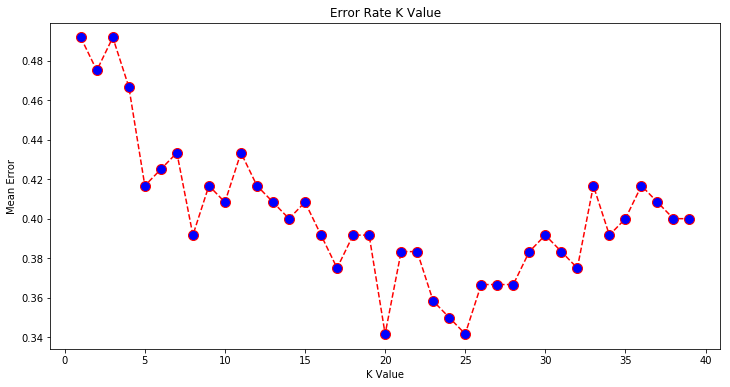

In [86]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 


In [87]:
plt.show()

#### The least error rate is at 25 so we use this value for checking the accuracy of our model. Since the ka value is larger than the previous k value we might get more accurate results.

### STEP 6: Fit the optimal K

In [90]:
classifier = KNeighborsClassifier(n_neighbors=25)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [91]:
y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[14  3  0  0  0  0]
 [ 3 16  3  0  0  0]
 [ 0  7 25  3  0  0]
 [ 0  1  8 14  0  0]
 [ 0  0  4  3  6  0]
 [ 0  0  1  5  0  4]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.59      0.73      0.65        22
           2       0.61      0.71      0.66        35
           3       0.56      0.61      0.58        23
           4       1.00      0.46      0.63        13
           5       1.00      0.40      0.57        10

   micro avg       0.66      0.66      0.66       120
   macro avg       0.76      0.62      0.65       120
weighted avg       0.70      0.66      0.66       120



### Conclusions:
* **Since the data is imbalanced we will consider the f1 score to test the accuracy of our model.**

* **The average weighted f1 score when k=5 we observe an f1 score of 0.57.**

* **Next we increased our k value to be square root of the number of instances in pur training data ie., k=17. Now the f1 score is 0.62. We observe an increase in the accuracy with the increase of k value.**

* **Later, we took a set of values from 1-40 to find the optimal k value and we found out that the optimal k value is 25.** 

* **Here the f1 score is 0.66 which is more when compared to k=17.**

* **May be we can increase the range from 40 to a higher number to get even more accurate results.**

* **From these above values we can say that based on the GRE Score,TOEFL Score LOR and Sop rating we can predict the chances of a candidate being admitted to a University using KNN algorithm**